In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
brent = pd.read_csv('BrentOilPrices.csv')

In [3]:
brent.head()

,Date,Price
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [4]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
Date     8216 non-null object
Price    8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


In [5]:
brent.describe()

,Price
count,8216.000000
mean,46.332605
std,32.704113
min,9.100000
25%,18.730000
50%,31.260000
75%,67.432500
max,143.950000


# Data Preprocessing

In [6]:
import seaborn as sns

In [7]:
brent['Date'] = pd.to_datetime(brent['Date'], format="%b %d, %Y")
brent.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [37]:
brent.tail()

,Date,Price
8211,2019-09-24,64.13
8212,2019-09-25,62.41
8213,2019-09-26,62.08
8214,2019-09-27,62.48
8215,2019-09-30,60.99


# Data Visualization

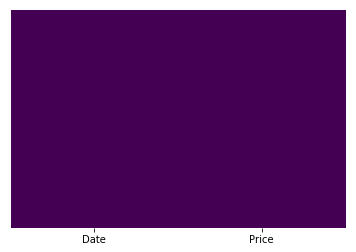

In [8]:
sns.heatmap(brent.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#showing the presence of missing values

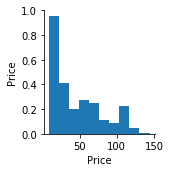

In [9]:
sns.pairplot(brent)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


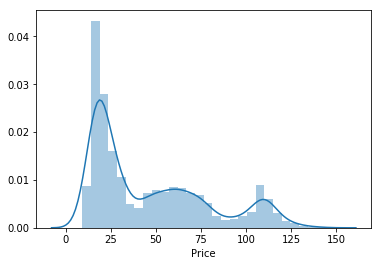

In [10]:
sns.distplot(brent['Price'])

Text(0.5, 1.0, 'Brent Oil Price Trend')

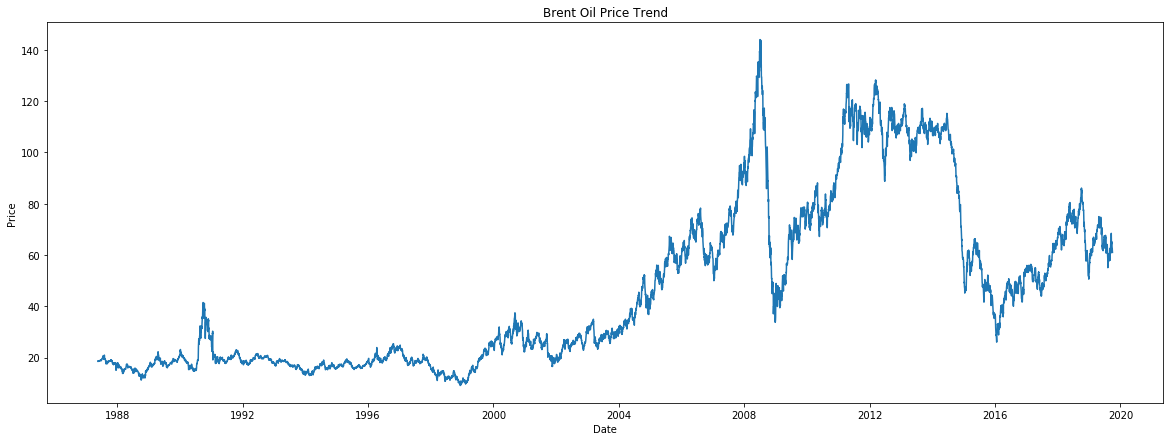

In [11]:
plt.figure(figsize=(20,7))
g = sns.lineplot(x='Date',y='Price',data = brent)
plt.title("Brent Oil Price Trend")

In [ ]:
from fbprophet import prophet

In [38]:
pro_df = brent
pro_df.columns = ['ds','y']
pro_df.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Fitting into a Linear regression model

In [28]:
#using linear regression
brent.columns

Index(['Date', 'Price'], dtype='object')

In [29]:
X=brent[['Date']]
#attributing

In [30]:
y = brent[['Price']]

In [16]:
import sklearn as scikit_learn

In [19]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
ln = LinearRegression()

In [23]:
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
print(ln.intercept_)

[-40.20219962]


In [27]:
ln.coef_

array([[8.1421083e-17]])

# Getting Predictions

In [35]:
predict = ln.predict(X_test)

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

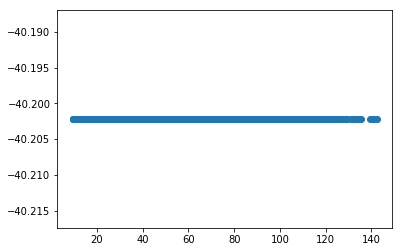

In [36]:
plt.scatter(y_test,predict)